In [1]:
import fitz  
import re
from collections import defaultdict
import matplotlib.pyplot as plt


file_path = '2021-OL-GEN.pdf'
doc = fitz.open(file_path)


text = ''
for page in doc:
    text += page.get_text()

text[:1000]  


'2021 RESULTS: GENERAL CERTIFICATE OF EDUCATION EXAMINATION - ORDINARY LEVEL\n2021 GCE RESULTS\nCentre No:  11000 CCAS KUMBA B  \nRegist: 288, Sat for 4 or more Subjects: 133, Passed : 44\n% Passed : 33.08, Sanctioned : 3\nResults of Successful Candidates In Order Of Merit\nPassed In 10 Subjects: 1\nNINA NDOGMOH ARMEL \nAMA-B,BIO-C,CHE-C,ECO-C,ENL-C,FRE-C,GEO-C,HBI-\nC,MAT-B,PHY-C\n(1)\nPassed In 8 Subjects: 5\nKAH MELANIE NSEH \nCOM-C,CTZ-C,ECO-A,ENL-B,FRE-C,GEO-C,HIS-B,LIT-\nB\n(1)\nMBAH MANGA PERRY \nBIO-B,CHE-C,ECO-B,ENL-C,GGY-C,HBI-C,MAT-C,PHY-\nB\n(2)\nFEJA CLIVE NGOH \nBIO-C,CHE-C,CSC-C,ECO-B,ENL-C,GEO-C,HBI-C,PHY-\nC\n(3)\nNGEME ALLOBWEDE MBWOGE \nBIO-B,CHE-C,ECO-C,ENL-C,GEO-C,HBI-C,MAT-C,PHY-\nC\n(4)\nSIR BRANDON NNOKO ESAPE \nCOM-C,CTZ-C,ECO-C,FRE-C,GEO-C,HIS-C,LIT-C,REL-\nC\n(5)\nPassed In 7 Subjects: 4\nNATHALY MBEI DRAH \nBIO-C,COM-C,ECO-B,ENL-B,GEO-C,HIS-A,LIT-B\n(1)\nBAMU GISELE ABONGWA \nAMA-C,BIO-C,CHE-B,ENL-C,FRE-C,MAT-C,PHY-B\n(2)\nESOKA RACHEL MEJANG \nBIO-C,CHE-C,E

In [2]:
grade_to_points = {
    'A': 3,
    'B': 2,
    'C': 1,
}

pattern = re.compile(r'([A-Z\s]+)\s*([A-Z\n]{3,5}-\n*[A-E]\n*(?:,\s*[A-Z\n]{3,5}-\n*[A-E]\n*)*)\s*\(\d+\)')

class Record:
    def __init__(self, record):
        self.name, self.grades = sanitize_record(record)
        self.points = calculate_points(self.grades)
        self.gpa = 5 * self.points / grade_to_points['A'] / len(self.grades) #Flawed!!! Assumes students passed all subjects they took.
    
    def __repr__(self):
        # return f"{self.name}: {self.points} points -> {self.grades}"
        return f"GPA: {self.gpa:.2f} | {self.points} points -> {self.grades}"
    
    def __str__(self) -> str:
        return self.__repr__()

class GradeDist:
    def __init__(self) -> None:
        self.names = []
        self.count = 0
    
    def add(self, name):
        self.names.append(name)
        self.count += 1
    
    def __str__(self) -> str:
        return f"{self.count}"  
    
    def __repr__(self) -> str:
        return f"{self.count}"

def calculate_points(grades):
    total_points = 0
    for grade in grades.values():
        total_points += grade_to_points[grade]
    return total_points

def sanitize_record(record):
    name, grades_str = record
    grades = {}
    for t_grade in grades_str.split(','):
        if "-" not in t_grade:
            continue
        subject, grade = t_grade.split('-')
        grade = "".join(grade.split("\n"))
        subject = "".join(subject.split("\n"))
        grades[subject.strip()] = grade.strip()

    return name.strip(), grades


def return_first_n_chars_or_fill_with_spaces(text):
    n = 30
    return text[:n] + " " * (n - len(text[:n]))

In [3]:
candidates = pattern.findall(text)
dict_candidates = { candidate[0].strip(): Record(candidate) for candidate in candidates }
grade_distribution = defaultdict(GradeDist)
gpa_distribution = defaultdict(GradeDist)
# Summary of candidates
print(f"Total number of candidates: {len(dict_candidates)}")

Total number of candidates: 46481


In [4]:
def top_n_percent(grade_distribution, grade, gpa = False):
    total_candidates = len(dict_candidates)
    candidates_considered = 0
    while (grade <= 33) if not gpa else (grade <= 5):
        candidates_considered += grade_distribution[round(grade, 2)].count
        grade += 1 if not gpa else 0.01
    return candidates_considered / total_candidates * 100

In [5]:


for ind, candidate in enumerate(dict_candidates):
    if ind == 10:
        break
    print(candidate, dict_candidates[candidate])

NINA NDOGMOH ARMEL GPA: 2.00 | 12 points -> {'AMA': 'B', 'BIO': 'C', 'CHE': 'C', 'ECO': 'C', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'HBI': 'C', 'MAT': 'B', 'PHY': 'C'}
KAH MELANIE NSEH GPA: 2.71 | 13 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'B'}
MBAH MANGA PERRY GPA: 2.29 | 11 points -> {'BIO': 'B', 'CHE': 'C', 'ECO': 'B', 'ENL': 'C', 'GGY': 'C', 'HBI': 'C', 'MAT': 'C', 'PHY': 'B'}
FEJA CLIVE NGOH GPA: 1.88 | 9 points -> {'BIO': 'C', 'CHE': 'C', 'CSC': 'C', 'ECO': 'B', 'ENL': 'C', 'GEO': 'C', 'HBI': 'C', 'PHY': 'C'}
NGEME ALLOBWEDE MBWOGE GPA: 1.88 | 9 points -> {'BIO': 'B', 'CHE': 'C', 'ECO': 'C', 'ENL': 'C', 'GEO': 'C', 'HBI': 'C', 'MAT': 'C', 'PHY': 'C'}
SIR BRANDON NNOKO ESAPE GPA: 1.67 | 8 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'C', 'FRE': 'C', 'GEO': 'C', 'HIS': 'C', 'LIT': 'C', 'REL': 'C'}
NATHALY MBEI DRAH GPA: 2.86 | 12 points -> {'BIO': 'C', 'COM': 'C', 'ECO': 'B', 'ENL': 'B', 'GEO': 'C', 'HIS': 'A', 'LIT': 'B'}
BAM

<BarContainer object of 30 artists>

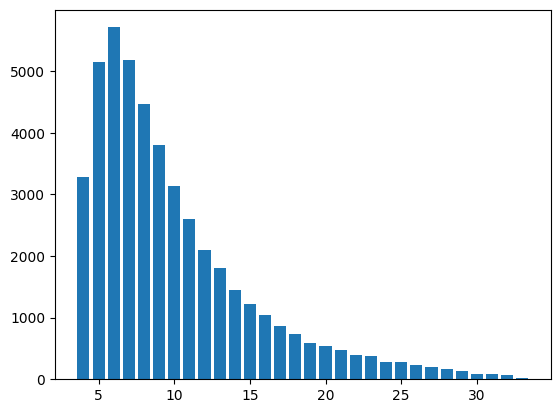

In [6]:
grade_distribution = defaultdict(GradeDist)
for candidate in dict_candidates:
    grade_distribution[dict_candidates[candidate].points].add(candidate)
    gpa_distribution[round(dict_candidates[candidate].gpa, 2)].add(candidate)

plt.bar(grade_distribution.keys(), [grade_distribution[key].count for key in grade_distribution.keys()])

<BarContainer object of 334 artists>

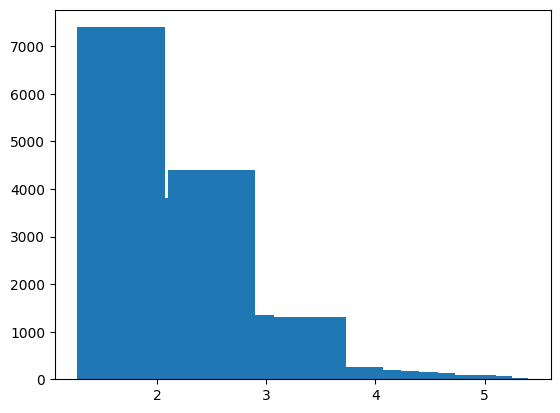

In [17]:
plt.bar(gpa_distribution.keys(), [gpa_distribution[key].count for key in gpa_distribution.keys()])

In [7]:
print("Points \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(grade_distribution.keys(), reverse=True):
    print(f"{key}\t: \t\t{grade_distribution[key]} \t\t: \t\t{top_n_percent(grade_distribution, key):.2f}%")

Points 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
33	: 		13 		: 		0.03%
32	: 		69 		: 		0.18%
31	: 		81 		: 		0.35%
30	: 		92 		: 		0.55%
29	: 		133 		: 		0.83%
28	: 		161 		: 		1.18%
27	: 		198 		: 		1.61%
26	: 		239 		: 		2.12%
25	: 		287 		: 		2.74%
24	: 		288 		: 		3.36%
23	: 		373 		: 		4.16%
22	: 		393 		: 		5.01%
21	: 		479 		: 		6.04%
20	: 		540 		: 		7.20%
19	: 		582 		: 		8.45%
18	: 		740 		: 		10.04%
17	: 		863 		: 		11.90%
16	: 		1039 		: 		14.13%
15	: 		1219 		: 		16.76%
14	: 		1442 		: 		19.86%
13	: 		1801 		: 		23.73%
12	: 		2104 		: 		28.26%
11	: 		2599 		: 		33.85%
10	: 		3142 		: 		40.61%
9	: 		3801 		: 		48.79%
8	: 		4465 		: 		58.40%
7	: 		5180 		: 		69.54%
6	: 		5714 		: 		81.83%
5	: 		5155 		: 		92.92%
4	: 		3289 		: 		100.00%


In [8]:
print("GPA \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(gpa_distribution.keys(), reverse=True):
    if gpa_distribution[key].count == 0:
        continue
    print(f"{key:.2f}\t: \t\t{gpa_distribution[key]} \t\t: \t\t{top_n_percent(gpa_distribution, key, True):.2f}%")

GPA 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
5.00	: 		35 		: 		0.08%
4.85	: 		69 		: 		0.22%
4.83	: 		47 		: 		0.32%
4.81	: 		8 		: 		0.34%
4.79	: 		3 		: 		0.35%
4.76	: 		1 		: 		0.35%
4.70	: 		81 		: 		0.52%
4.67	: 		72 		: 		0.68%
4.63	: 		15 		: 		0.71%
4.58	: 		4 		: 		0.72%
4.55	: 		73 		: 		0.88%
4.52	: 		4 		: 		0.89%
4.50	: 		100 		: 		1.10%
4.44	: 		30 		: 		1.17%
4.39	: 		86 		: 		1.35%
4.38	: 		14 		: 		1.38%
4.33	: 		123 		: 		1.65%
4.29	: 		7 		: 		1.66%
4.26	: 		38 		: 		1.74%
4.24	: 		89 		: 		1.93%
4.17	: 		162 		: 		2.28%
4.09	: 		96 		: 		2.49%
4.07	: 		56 		: 		2.61%
4.05	: 		18 		: 		2.65%
4.00	: 		169 		: 		3.01%
3.96	: 		31 		: 		3.08%
3.94	: 		108 		: 		3.31%
3.89	: 		95 		: 		3.52%
3.83	: 		196 		: 		3.94%
3.81	: 		28 		: 		4.00%
3.79	: 		136 		: 		4.29%
3.75	: 		93 		: 		4.49%
3.70	: 		114 		: 		4.74%
3.67	: 		248 		: 		5.27%
3.64	: 		93 		: 		5.47%
3.61	: 		46 		: 		5.57%
3.57	: 		71 		: 		5.7

In [9]:
## All 25 points candidates

print(f"Total {grade_distribution[33].count} candidates with 33 points")
print(f"Candidates with 33 points(top {top_n_percent(grade_distribution, 33):.2f}%):")
for candidate in grade_distribution[33].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 13 candidates with 33 points
Candidates with 33 points(top 0.03%):
	 EBEBE LIONEL MAKUMBA           	 GPA: 5.00 | 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 LEBONG LAURA AKONG             	 GPA: 5.00 | 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 DIONE MPACKO LARISSA           	 GPA: 5.00 | 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 AWA SUCCESS PAYNE              	 GPA: 5.00 | 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 NOUSSI TIRZAH TRESOR           	 GPA: 5.00 | 33 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A'

In [10]:
## All 32 points candidates

print(f"Total {grade_distribution[32].count} candidates with 32 points")
print(f"Candidates with 32 points(top {top_n_percent(grade_distribution, 32):.2f}%):")
for candidate in grade_distribution[32].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 69 candidates with 32 points
Candidates with 32 points(top 0.18%):
	 HEPHZIBAH MALET KWEDE          	 GPA: 4.85 | 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 NZEPHOR NJOMO ROBY             	 GPA: 4.85 | 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B', 'SBRF': 'A'}
	 NDAH DAVID                     	 GPA: 4.85 | 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 TATCHOUANG DJOUOTE DARRELLE    	 GPA: 4.85 | 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B', 'SBRF': 'A'}
	 NGORAN PRECIOUS AFANUI         	 GPA: 4.85 | 32 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': '

In [11]:
## All 31 points candidates

print(f"Total {grade_distribution[31].count} candidates with 31 points")
print(f"Candidates with 31 points(top {top_n_percent(grade_distribution, 31):.2f}%):")
for candidate in grade_distribution[31].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 81 candidates with 31 points
Candidates with 31 points(top 0.35%):
	 FOINTAMA CHRISTELLE MUSO       	 GPA: 4.70 | 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'HIS': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 YEFON WILL VERDZE              	 GPA: 4.70 | 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 PALMER JR YONGKA YERIMA        	 GPA: 4.70 | 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 TEFU FREDDY DIANGHA            	 GPA: 4.70 | 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 MICHELLE EBIKA FOKAM           	 GPA: 4.70 | 31 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'B', 'FRE': 'A', 'GEO': 'A'

In [12]:
## All 30 points candidates

print(f"Total {grade_distribution[30].count} candidates with 30 points")
print(f"Candidates with 30 points(top {top_n_percent(grade_distribution, 30):.2f}%):")
for candidate in grade_distribution[30].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 92 candidates with 30 points
Candidates with 30 points(top 0.55%):
	 HOMKOMNDO NJEUKWA MATHIAS YVAN 	 GPA: 4.55 | 30 points -> {'AMA': 'A', 'BIO': 'B', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B', 'SBRF': 'A'}
	 KOUAMO NOUBIENGANG BETTY BARBA 	 GPA: 4.55 | 30 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'B', 'MAT': 'A', 'PHY': 'B', 'REL': 'B'}
	 TITA AKWESHI MAITE LORELLA     	 GPA: 4.55 | 30 points -> {'AMA': 'A', 'BIO': 'B', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'B', 'MAT': 'A', 'PHY': 'A', 'REL': 'A'}
	 ZOKEH BRICE NTANGKELE          	 GPA: 4.55 | 30 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 MAFANY OVASE LIFIO CARR        	 GPA: 4.55 | 30 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'A

In [13]:
## All 29 points candidates

print(f"Total {grade_distribution[29].count} candidates with 29 points")
print(f"Candidates with 29 points(top {top_n_percent(grade_distribution, 29):.2f}%):")
for candidate in grade_distribution[29].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 133 candidates with 29 points
Candidates with 29 points(top 0.83%):
	 SUH BRANDON NJUIEBU            	 GPA: 4.83 | 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A'}
	 TAMBE ENOWTABI PRINCELY        	 GPA: 4.83 | 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'HBI': 'B', 'MAT': 'A', 'PHY': 'A'}
	 JEMIMA SHARON TAPANG           	 GPA: 4.39 | 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 TABE MARION OJONG              	 GPA: 4.39 | 29 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'B', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B', 'SBRF': 'C'}
	 NKEANGNYI FESTA YIMNAI         	 GPA: 4.39 | 29 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'C', 'GEO': 'B', 'MAT': 'A', 'PHY': '

In [14]:
## All 28 points candidates

print(f"Total {grade_distribution[28].count} candidates with 28 points")
print(f"Candidates with 28 points(top {top_n_percent(grade_distribution, 28):.2f}%):")
for candidate in grade_distribution[28].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 161 candidates with 28 points
Candidates with 28 points(top 1.18%):
	 MUKAM PONGO PENDA ALLEC ARNOLD 	 GPA: 4.67 | 28 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'A', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A'}
	 MARIE THERESE TCHOUKEU TEGHA   	 GPA: 4.67 | 28 points -> {'AMA': 'B', 'BIO': 'A', 'CHE': 'A', 'ECO': 'A', 'ENL': 'A', 'GEO': 'A', 'HBI': 'B', 'MAT': 'A', 'PHY': 'A', 'SBRF': 'A'}
	 LAILA TIMAKO                   	 GPA: 4.67 | 28 points -> {'AMA': 'B', 'BIO': 'A', 'CHE': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'HBI': 'B', 'MAT': 'A', 'PHY': 'A'}
	 AGENDIA PETER FUAMAZEH         	 GPA: 4.24 | 28 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'C'}
	 NGAH ANNABEL FONYUY            	 GPA: 4.67 | 28 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'ECO': 'A', 'ENL': 'B', 'GEO': 'A', 'HBI': 'A', 'MAT': 'A', 'PHY': 'A', 'REL': 'B'}
	 KOUATC

In [15]:
## All 27 points candidates

print(f"Total {grade_distribution[27].count} candidates with 27 points")
print(f"Candidates with 27 points(top {top_n_percent(grade_distribution, 27):.2f}%):")
for candidate in grade_distribution[27].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 198 candidates with 27 points
Candidates with 27 points(top 1.61%):
	 RABIATOU ALIOU                 	 GPA: 4.50 | 27 points -> {'AMA': 'B', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'MAT': 'B', 'PHY': 'B'}
	 OWOUNDI MANGA ROMARIC DAVY     	 GPA: 4.50 | 27 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'B', 'GEO': 'A', 'MAT': 'A', 'PHY': 'A'}
	 ALENWI LUMBI AKONGNWI MUGYIA   	 GPA: 4.50 | 27 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'ECO': 'A', 'ENL': 'A', 'FRE': 'A', 'GEO': 'A', 'HBI': 'C', 'MAT': 'A', 'PHY': 'B'}
	 NDAGNDEM JOSHUA TAZOAH         	 GPA: 4.09 | 27 points -> {'AMA': 'A', 'BIO': 'A', 'CHE': 'A', 'CSC': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'A', 'MAT': 'B', 'PHY': 'A', 'REL': 'B'}
	 FEKAM WABO FRIEDY KABREL       	 GPA: 4.09 | 27 points -> {'AMA': 'B', 'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'ECO': 'A', 'ENL': 'B', 'FRE': 'B', 'GEO': 'A', 'MAT': 'B', 'PHY': 'A', 'REL': 'C